In [1]:
import numpy as np
from helpers import *
from implementations import *
from preprocess import *
from cross_validation import *

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
from helpers import *
from implementations import *
from preprocess import *
from cross_validation import *


variables_set = {'PAQ650', '_RACEGR3', 'DRNK3GE5', '_FRTRESP', 'CHILDREN', 'VEGETAB1', 'PAQ670', '_SMOKER3', 
 '_RFBMI5', 'TOLDHI2', '_RFHLTH', '_PAINDX2', 'INCOME2', '_HISPANC', 'FVBEANS', '_DRNKWEK', 
 'PA1MIN_', 'FRUIT1', '_HCVU651', '_AGE80', 'HTM4', '_CHOLCHK', 'FVGREEN', 'VEGEDA1_', 'ALCDAY5', 
 '_RFPAVIG', '_RFSMOK3', '_RACE_G1', 'BEANDAY_', '_CASTHM1', 'ORNGDAY_', 'SMOKDAY2', '_CHLDCNT', 
 '_METVL11', 'PAQ665', '_AGEG5YR', 'MRACORG1', 'ORACE3', 'SEX', 'HAVARTH3', 'HISPANC3', '_PAQ6C', 
 'DROCDY3_', 'AGE', 'HLTHPLN1', '_MICHD', 'FTJUDA1_', '_VEGRESP', '_RFDRHV5', 'FRUTDA1_', '_VEGESUM', 
 'WEIGHT2', '_MISFRTN', 'CVDCRHD4', 'BPHIGH4', '_DRDXAR1', 'XPA1MIN_', '_PASTRNG', '_RACEG21', '_IMPAGE', 
 '_PRACE1', '_INCOMG', 'AVEDRNK', '_METVL21', '_MISVEGN', '_RFCHOL', 'PAQ655', 'HEIGHT3', '_PAREC1', 
 '_RFBING5', '_PACAT1', '_FRUTVEG', '_RFHYPE5', 'DRNKANY5', '_MRACE1', 'GRENDAY_', 'PAQ660', 'GENHLTH', 
 '_BMI5', 'FVORANG', '_EDUCAG', '_BMI5CAT', '_LTASTH1', 'MRACE1', '_ASTHMS1', '_FRUTSUM', 'ASTHMA3', 
 'BLOODCHO', 'SMOKE100', '_AGE_G', 'EDUCA', 'WTKG3', 'ASTHNOW', 'CVDINFR4', 'HTIN4', '_RACE', 'FRUITJU1', 
 'MRACASC1', '_AGE65YR', 'CHOLCHK'}

def undersample(X,y,seed=42):
    np.random.seed(seed)

    minority_count=y[y==1].shape[0]
    
    undersampled_majority_indices = np.random.choice(np.where(y == 0)[0], minority_count, replace=False)
    undersampled_indices = np.random.permutation(np.concatenate([undersampled_majority_indices, np.where(y == 1)[0]]))

    X_undersampled = X[undersampled_indices]
    y_undersampled = y[undersampled_indices]

    return X_undersampled,y_undersampled

data_path="../data/dataset_to_release"
x_train, x_test, y_train, train_ids, test_ids, col_names_train, col_names_test,final_columns = load_csv_data(data_path, selected_cols=variables_set)

y_train[y_train==-1]=0
X_train,X_test,numerical_columns_indices=apply_preprocessing(x_train,x_test)

X_train,mean,std=standardize(X_train)
X_test,_,_=standardize(X_test,mean,std)

X_undersampled,y_undersampled=undersample(X_train,y_train)


initial_w=np.zeros((X_train.shape[1],))

w,loss=ridge_regression(y_undersampled,X_undersampled,lambda_=0.01)

y_pred,scores = ridge_predict(X_test,w,threshold=0.5)

y_pred[y_pred==0]=-1
create_csv_submission(test_ids,y_pred,"submission.csv")

In [2]:
variables_set = {'PAQ650', '_RACEGR3', 'DRNK3GE5', '_FRTRESP', 'CHILDREN', 'VEGETAB1', 'PAQ670', '_SMOKER3', 
 '_RFBMI5', 'TOLDHI2', '_RFHLTH', '_PAINDX2', 'INCOME2', '_HISPANC', 'FVBEANS', '_DRNKWEK', 
 'PA1MIN_', 'FRUIT1', '_HCVU651', '_AGE80', 'HTM4', '_CHOLCHK', 'FVGREEN', 'VEGEDA1_', 'ALCDAY5', 
 '_RFPAVIG', '_RFSMOK3', '_RACE_G1', 'BEANDAY_', '_CASTHM1', 'ORNGDAY_', 'SMOKDAY2', '_CHLDCNT', 
 '_METVL11', 'PAQ665', '_AGEG5YR', 'MRACORG1', 'ORACE3', 'SEX', 'HAVARTH3', 'HISPANC3', '_PAQ6C', 
 'DROCDY3_', 'AGE', 'HLTHPLN1', '_MICHD', 'FTJUDA1_', '_VEGRESP', '_RFDRHV5', 'FRUTDA1_', '_VEGESUM', 
 'WEIGHT2', '_MISFRTN', 'CVDCRHD4', 'BPHIGH4', '_DRDXAR1', 'XPA1MIN_', '_PASTRNG', '_RACEG21', '_IMPAGE', 
 '_PRACE1', '_INCOMG', 'AVEDRNK', '_METVL21', '_MISVEGN', '_RFCHOL', 'PAQ655', 'HEIGHT3', '_PAREC1', 
 '_RFBING5', '_PACAT1', '_FRUTVEG', '_RFHYPE5', 'DRNKANY5', '_MRACE1', 'GRENDAY_', 'PAQ660', 'GENHLTH', 
 '_BMI5', 'FVORANG', '_EDUCAG', '_BMI5CAT', '_LTASTH1', 'MRACE1', '_ASTHMS1', '_FRUTSUM', 'ASTHMA3', 
 'BLOODCHO', 'SMOKE100', '_AGE_G', 'EDUCA', 'WTKG3', 'ASTHNOW', 'CVDINFR4', 'HTIN4', '_RACE', 'FRUITJU1', 
 'MRACASC1', '_AGE65YR', 'CHOLCHK'}


In [3]:
data_path="../data/dataset_to_release"
x_train, x_test, y_train, train_ids, test_ids, col_names_train, col_names_test,final_columns = load_csv_data(data_path, selected_cols=variables_set)

In [4]:
#Shifting -1 labels to 0
y_train[y_train==-1]=0

In [5]:
X_train,X_test,numerical_columns_indices=apply_preprocessing(x_train,x_test)

In [7]:
def undersample(X,y,seed=42):
    np.random.seed(seed)

    minority_count=y[y==1].shape[0]
    
    undersampled_majority_indices = np.random.choice(np.where(y == 0)[0], minority_count, replace=False)
    undersampled_indices = np.random.permutation(np.concatenate([undersampled_majority_indices, np.where(y == 1)[0]]))

    X_undersampled = X[undersampled_indices]
    y_undersampled = y[undersampled_indices]

    return X_undersampled,y_undersampled


In [8]:
def calculate_metrics(y_pred,y_true):
    accuracy=y_pred[y_pred==y_true].shape[0]/y_pred.shape[0]
    precision={};recall={}
    for label in np.unique(y_true):
        try:
            precision[label]=y_pred[(y_pred==label) & (y_true==label)].shape[0]/y_pred[y_pred==label].shape[0]
        except:
            continue
        try:
            recall[label]=y_pred[(y_pred==label) & (y_true==label)].shape[0]/y_true[y_true==label].shape[0]
        except:
            continue
    
    f1_scores = {}
    for label in precision.keys():
        if precision[label] + recall[label] != 0:
            f1_scores[label] = 2 * (precision[label] * recall[label]) / (precision[label] + recall[label])
        else:
            f1_scores[label] = 0.0

    return accuracy,precision,recall,f1_scores

def calculate_confusion_mat(y_pred,y_true):
    unique_labels=np.unique(y_true)
    conf_matrix=np.zeros((len(unique_labels),len(unique_labels)))
    #print(conf_matrix.shape)
    for i,pred_label in enumerate(unique_labels):
        for j,true_label in enumerate(unique_labels):
            conf_matrix[i,j]=y_pred[(y_pred==pred_label) & (y_true==true_label)].shape[0]
    return conf_matrix



In [9]:
k_folds=stratified_K_fold(y_train,seed=42)

In [49]:
def cross_validate(X_train,y_train,k_folds,train_func,loss_function,predict_function,*args,**kwargs):
    results=[]
    for i,(train_fold,val_fold) in enumerate(k_folds):
        results_dict={}
        #print("Fold",i+1)
        x_train_fold, x_val_fold = (X_train[train_fold],X_train[val_fold])
        y_train_fold=y_train[train_fold]
        y_val_fold=y_train[val_fold]
        
        x_train_fold,mean,std=standardize(x_train_fold)
        x_val_fold,_,_=standardize(x_val_fold,mean,std)

        
        initial_w=np.zeros((x_train_fold.shape[1],))

        X_undersampled,y_undersampled=undersample(X_train,y_train)

        try:
            w,loss=train_func(y_undersampled,X_undersampled,initial_w=initial_w,*args,**kwargs)
        except:
            w,loss=train_func(y_undersampled,X_undersampled,*args,**kwargs)
        
        y_pred,scores = predict_function(X_undersampled,w,threshold=0.5)
        tr_accuracy,tr_precision,tr_recall,tr_f1_scores=calculate_metrics(y_undersampled,y_pred)
        
        y_pred,scores = predict_function(x_val_fold,w,threshold=0.5)
        vl_accuracy,vl_precision,vl_recall,vl_f1_scores=calculate_metrics(y_val_fold,y_pred)


        results_dict["name"]=train_func.__name__
        results_dict["loss_type"]=loss_function.__name__
        results_dict["predict_type"]=predict_function.__name__

        results_dict.update(kwargs)
        results_dict["w"]=w
        results_dict["fold"]=i+1
        
        results_dict["tr_loss"]=loss
        results_dict["tr_accuracy"]=tr_accuracy
        results_dict["tr_precision"]=tr_precision
        results_dict["tr_recall"]=tr_recall
        results_dict["tr_f1_scores"]=tr_f1_scores

        results_dict["vl_loss"]=loss_function(y_val_fold,x_val_fold,w)
        results_dict["vl_accuracy"]=vl_accuracy
        results_dict["vl_precision"]=vl_precision
        results_dict["vl_recall"]=vl_recall
        results_dict["vl_f1_scores"]=vl_f1_scores
        
        
        results_dict["conf_matrix"]=calculate_confusion_mat(y_pred,y_val_fold)

        results.append(results_dict)
    
    return results

In [46]:
ridge_results=cross_validate(X_train,y_train,k_folds,
                             ridge_regression,
                             calculate_mse_loss,
                             ridge_predict,
                            lambda_=0.001,)
                            #max_iters=1000, 
                            #gamma=0.06)


In [19]:
print(ridge_results[4]["tr_f1_scores"])
print(ridge_results[4]["vl_f1_scores"])

{0.0: 0.7535567567567567, 1.0: 0.6325201504567437}
{0.0: 0.9255932246932187, 1.0: 0.39980658976307243}


In [47]:
ridge_results

[{'name': 'ridge_regression',
  'loss_type': 'calculate_mse_loss',
  'predict_type': 'ridge_predict',
  'lambda_': 0.001,
  'w': array([-7.52878275e-06, -8.00217820e-05,  2.63989584e-05, -8.15363454e-06,
          1.55051757e-03,  2.12337592e-05,  5.03475927e-04, -3.78209525e-06,
          8.76859189e-04, -4.35126269e-04,  9.77920390e-03,  1.97963200e-02,
          8.13512548e-03,  1.73428267e-05,  8.08282235e-03, -4.19601426e-06,
         -9.90683726e-03,  1.10187247e-06,  6.84585337e-05,  5.85863265e-03,
          1.13414538e-02, -6.59242413e-03,  1.04666030e-03,  1.16160474e-02,
         -1.92629378e-02,  1.75545893e-02,  5.01411961e-03,  8.75662710e-03,
          6.86536755e-03, -3.19886790e-04, -1.05097690e-02,  2.07373547e-02,
         -1.27363631e-01, -1.06435585e-02,  7.76473694e-03,  5.55315529e-03,
         -1.27216569e-03, -1.56505539e-02,  1.35125262e-02, -1.65263933e-02,
          1.12623324e-02,  1.12461751e-02, -4.02664007e-02, -1.00755040e-02,
         -2.96742790e-02, 

In [50]:
from itertools import product

functions=[
(reg_logistic_regression,calculate_logistic_loss,logit_predict),
#(least_squares,calculate_mse_loss,least_sq_predict),
(logistic_regression,calculate_logistic_loss,logit_predict),
(ridge_regression,calculate_mse_loss,ridge_predict),
(ridge_regression,calculate_mse_loss,logit_predict),
(mean_squared_error_sgd,calculate_mse_loss,least_sq_predict),
(mean_squared_error_gd,calculate_mse_loss,least_sq_predict)
]

grid_search_dict={
    "lambda_" : [1,0.5,0.1,0.01],
    "gamma" : [0.01,0.001,0.0001],
    "max_iters" : [100,250,500]
}

function_kwargs= {
"ridge_regression_gd" : ["lambda_","gamma","max_iters"],
"reg_logistic_regression" : ["lambda_","gamma","max_iters"],
"logistic_regression" : ["gamma","max_iters"],
"ridge_regression" : ["lambda_"],
"least_squares" : [],
"mean_squared_error_sgd" : ["gamma","max_iters"],
"mean_squared_error_gd" : ["gamma","max_iters"] 
}

all_results=[]
for i,function in enumerate(functions):
    hyperparameters = function_kwargs[function[0].__name__]

    print(f"{i+1}/{len(functions)} STARTING: ({function[0].__name__}, {function[1].__name__} , {function[2].__name__})")
    
    if len(hyperparameters)==0:
        results=cross_validate(X_train,y_train,k_folds,*function)
        all_results.extend(results)
        continue

    param_combinations = product(*[grid_search_dict[param] for param in hyperparameters])
    
    for param in param_combinations:        
        kwarg=dict(zip(hyperparameters,list(param)))
        results=cross_validate(X_train,y_train,k_folds,*function,**kwarg)
        print(kwarg)
        all_results.extend(results)
    
    print(f"{i+1}/{len(functions)} DONE: ({function[0].__name__}, {function[1].__name__} , {function[2].__name__})")

    






1/6 STARTING: (reg_logistic_regression, calculate_logistic_loss , logit_predict)


/Users/berkeargin/Documents/GitHub/Turco-ML/project1/berke_trial/implementations.py:102: RuntimeWarning: overflow encountered in exp
  loss = np.sum(np.log(1 + np.exp(t)) - y * t) / y.shape[0]


{'lambda_': 1, 'gamma': 0.01, 'max_iters': 100}
{'lambda_': 1, 'gamma': 0.01, 'max_iters': 250}
{'lambda_': 1, 'gamma': 0.01, 'max_iters': 500}
{'lambda_': 1, 'gamma': 0.001, 'max_iters': 100}
{'lambda_': 1, 'gamma': 0.001, 'max_iters': 250}
{'lambda_': 1, 'gamma': 0.001, 'max_iters': 500}
{'lambda_': 1, 'gamma': 0.0001, 'max_iters': 100}
{'lambda_': 1, 'gamma': 0.0001, 'max_iters': 250}
{'lambda_': 1, 'gamma': 0.0001, 'max_iters': 500}
{'lambda_': 0.5, 'gamma': 0.01, 'max_iters': 100}
{'lambda_': 0.5, 'gamma': 0.01, 'max_iters': 250}
{'lambda_': 0.5, 'gamma': 0.01, 'max_iters': 500}
{'lambda_': 0.5, 'gamma': 0.001, 'max_iters': 100}
{'lambda_': 0.5, 'gamma': 0.001, 'max_iters': 250}
{'lambda_': 0.5, 'gamma': 0.001, 'max_iters': 500}
{'lambda_': 0.5, 'gamma': 0.0001, 'max_iters': 100}
{'lambda_': 0.5, 'gamma': 0.0001, 'max_iters': 250}
{'lambda_': 0.5, 'gamma': 0.0001, 'max_iters': 500}
{'lambda_': 0.1, 'gamma': 0.01, 'max_iters': 100}
{'lambda_': 0.1, 'gamma': 0.01, 'max_iters': 250}


/Users/berkeargin/Documents/GitHub/Turco-ML/project1/berke_trial/implementations.py:18: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2) / 2
/Users/berkeargin/Documents/GitHub/Turco-ML/project1/berke_trial/implementations.py:177: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * gradient_vector


Stochastic Gradient Descent(0/99): loss=0.0
Stochastic Gradient Descent(1/99): loss=0.0
Stochastic Gradient Descent(2/99): loss=0.0
Stochastic Gradient Descent(3/99): loss=0.0
Stochastic Gradient Descent(4/99): loss=0.0
Stochastic Gradient Descent(5/99): loss=195095689.44016084
Stochastic Gradient Descent(6/99): loss=1.1256530734465632e+16
Stochastic Gradient Descent(7/99): loss=7.204624598547436e+23
Stochastic Gradient Descent(8/99): loss=2.091816845892051e+31
Stochastic Gradient Descent(9/99): loss=1.8627094837748105e+39
Stochastic Gradient Descent(10/99): loss=5.580778898307582e+46
Stochastic Gradient Descent(11/99): loss=1.503231958524454e+55
Stochastic Gradient Descent(12/99): loss=2.236849878119088e+62
Stochastic Gradient Descent(13/99): loss=6.508951657477589e+70
Stochastic Gradient Descent(14/99): loss=2.090524830486315e+79
Stochastic Gradient Descent(15/99): loss=3.272421815429143e+87
Stochastic Gradient Descent(16/99): loss=9.762539692772392e+95
Stochastic Gradient Descent(17

/Users/berkeargin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Mean Squared Error GD => 65/99: loss=inf
Mean Squared Error GD => 66/99: loss=inf
Mean Squared Error GD => 67/99: loss=inf
Mean Squared Error GD => 68/99: loss=inf
Mean Squared Error GD => 69/99: loss=inf
Mean Squared Error GD => 70/99: loss=inf
Mean Squared Error GD => 71/99: loss=inf
Mean Squared Error GD => 72/99: loss=inf
Mean Squared Error GD => 73/99: loss=inf
Mean Squared Error GD => 74/99: loss=inf
Mean Squared Error GD => 75/99: loss=inf
Mean Squared Error GD => 76/99: loss=inf
Mean Squared Error GD => 77/99: loss=inf
Mean Squared Error GD => 78/99: loss=inf
Mean Squared Error GD => 79/99: loss=inf
Mean Squared Error GD => 80/99: loss=inf
Mean Squared Error GD => 81/99: loss=nan
Mean Squared Error GD => 82/99: loss=nan
Mean Squared Error GD => 83/99: loss=nan
Mean Squared Error GD => 84/99: loss=nan
Mean Squared Error GD => 85/99: loss=nan
Mean Squared Error GD => 86/99: loss=nan
Mean Squared Error GD => 87/99: loss=nan
Mean Squared Error GD => 88/99: loss=nan
Mean Squared Err

/Users/berkeargin/Documents/GitHub/Turco-ML/project1/berke_trial/implementations.py:149: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * gradient_vector


Mean Squared Error GD => 141/249: loss=nan
Mean Squared Error GD => 142/249: loss=nan
Mean Squared Error GD => 143/249: loss=nan
Mean Squared Error GD => 144/249: loss=nan
Mean Squared Error GD => 145/249: loss=nan
Mean Squared Error GD => 146/249: loss=nan
Mean Squared Error GD => 147/249: loss=nan
Mean Squared Error GD => 148/249: loss=nan
Mean Squared Error GD => 149/249: loss=nan
Mean Squared Error GD => 150/249: loss=nan
Mean Squared Error GD => 151/249: loss=nan
Mean Squared Error GD => 152/249: loss=nan
Mean Squared Error GD => 153/249: loss=nan
Mean Squared Error GD => 154/249: loss=nan
Mean Squared Error GD => 155/249: loss=nan
Mean Squared Error GD => 156/249: loss=nan
Mean Squared Error GD => 157/249: loss=nan
Mean Squared Error GD => 158/249: loss=nan
Mean Squared Error GD => 159/249: loss=nan
Mean Squared Error GD => 160/249: loss=nan
Mean Squared Error GD => 161/249: loss=nan
Mean Squared Error GD => 162/249: loss=nan
Mean Squared Error GD => 163/249: loss=nan
Mean Square

In [62]:
from itertools import product

functions=[
#(reg_logistic_regression,calculate_logistic_loss,logit_predict),
#(least_squares,calculate_mse_loss,least_sq_predict),
#(logistic_regression,calculate_logistic_loss,logit_predict),
(ridge_regression,calculate_mse_loss,ridge_predict),
#(ridge_regression,calculate_mse_loss,logit_predict),
#(mean_squared_error_sgd,calculate_mse_loss,least_sq_predict),
#(mean_squared_error_gd,calculate_mse_loss,least_sq_predict)
]

grid_search_dict={
    "lambda_" : [0.01,0.05,0.06,0.07,0.005,0.006,0.0001,0.009],
    "gamma" : [0.01,0.001,0.0001],
    "max_iters" : [100,250,500]
}

function_kwargs= {
"ridge_regression_gd" : ["lambda_","gamma","max_iters"],
"reg_logistic_regression" : ["lambda_","gamma","max_iters"],
"logistic_regression" : ["gamma","max_iters"],
"ridge_regression" : ["lambda_"],
"least_squares" : [],
"mean_squared_error_sgd" : ["gamma","max_iters"],
"mean_squared_error_gd" : ["gamma","max_iters"] 
}

all_results=[]
for i,function in enumerate(functions):
    hyperparameters = function_kwargs[function[0].__name__]

    print(f"{i+1}/{len(functions)} STARTING: ({function[0].__name__}, {function[1].__name__} , {function[2].__name__})")
    
    if len(hyperparameters)==0:
        results=cross_validate(X_train,y_train,k_folds,*function)
        all_results.extend(results)
        continue

    param_combinations = product(*[grid_search_dict[param] for param in hyperparameters])
    
    for param in param_combinations:        
        kwarg=dict(zip(hyperparameters,list(param)))
        results=cross_validate(X_train,y_train,k_folds,*function,**kwarg)
        print(kwarg)
        all_results.extend(results)
    
    print(f"{i+1}/{len(functions)} DONE: ({function[0].__name__}, {function[1].__name__} , {function[2].__name__})")

1/1 STARTING: (ridge_regression, calculate_mse_loss , ridge_predict)
{'lambda_': 0.01}
{'lambda_': 0.05}
{'lambda_': 0.06}
{'lambda_': 0.07}
{'lambda_': 0.005}
{'lambda_': 0.006}
{'lambda_': 0.0001}
{'lambda_': 0.009}
1/1 DONE: (ridge_regression, calculate_mse_loss , ridge_predict)


In [63]:
len(all_results)

40

In [64]:
import pandas as pd
import pickle

with open("all_results_ridge.pkl","wb") as file:
    pickle.dump(all_results,file)

In [53]:
all_results=pd.read_pickle("all_results.pkl")
#all_results.extend(pd.read_pickle("all_results_reg_log.pkl"))

In [65]:
def result_to_csv(all_results):
    filtered_results=[]
    for results in all_results:
        del results["w"]
        del results["conf_matrix"]

        results["tr_precision"]=results["tr_precision"].get(1,np.nan)
        results["tr_recall"]=results["tr_recall"].get(1,np.nan)
        results["tr_f1_scores"]=results["tr_f1_scores"].get(1,np.nan)

        results["vl_precision"]=results["vl_precision"].get(1,np.nan)
        results["vl_recall"]=results["vl_recall"].get(1,np.nan)
        results["vl_f1_scores"]=results["vl_f1_scores"].get(1,np.nan)
        filtered_results.append(results)
    results_df=pd.DataFrame(filtered_results)
    results_df.to_csv("grid_search_results_ridge.csv")

result_to_csv(all_results)

{'name': 'reg_ridge_regression',
 'fold': 2,
 'tr_loss': 0.1308487089972607,
 'tr_accuracy': 0.6935289042277826,
 'tr_precision': {0.0: 0.9141932700603969, 1.0: 0.47286453839516823},
 'tr_recall': {0.0: 0.6342711762945226, 1.0: 0.8464092664092664},
 'tr_f1_scores': {0.0: 0.7489309065205867, 1.0: 0.6067533905341821},
 'vl_loss': 0.6726567619167677,
 'vl_accuracy': 0.8725067426516525,
 'vl_precision': {0.0: 0.9113350715336275, 1.0: 0.4716134598792062},
 'vl_recall': {0.0: 0.9468301238083662, 1.0: 0.34000995272455836},
 'vl_f1_scores': {0.0: 0.9287435807904888, 1.0: 0.3951420516157016},
 'conf_matrix': array([[54527.,  3062.],
        [ 5305.,  2733.]])}

<AxesSubplot:>

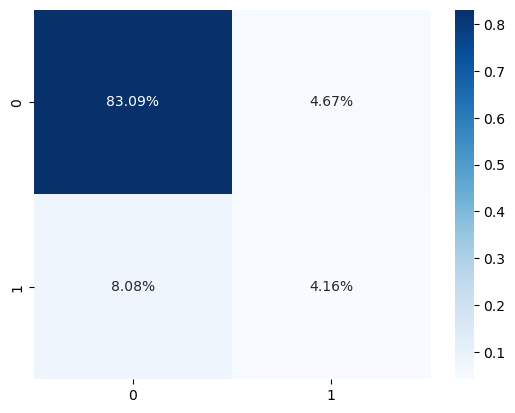

In [48]:
display(ridge_results[1])
cf_matrix=ridge_results[1]["conf_matrix"]
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')